# Análise de Regressão

O objetivo desse notebook é propor um modelo para estimar a concentração de cálcio em uma determinada matriz utilizando a técnica instrumental ICP-OES.

Após os planejemaneots fatoriais e triagem das variáveis, podemos começar a propor modelos. Iremos começar com um exemplo de calibração univariada.

Para tratar os dados, será utilizado a técnica dos mínimos quadrados e será realizada diversas análises de modo a verificar se o modelo atende a determinadas pressuposições, como: boa regressão, resíduos homecedásticos, confusão entre o erro puro e a falta de ajuste e sigificância dos coeficientes da regressão.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

* Criando a matriz X com as concentrações.

Para realizar os cálculos matriciais e estimar o coeficiente b0, adicionamos um vetor coluna com 1 do mesmo tamanho do vetor concentração

In [ ]:
X = np.array([4.24, 4.24, 6.02, 6.02, 6.90, 6.90, 8.13, 8.13, 10.18, 10.18]).reshape(-1, 1)
X = np.hstack([np.ones(X.shape), X])

In [ ]:
X

array([[ 1.  ,  4.24],
       [ 1.  ,  4.24],
       [ 1.  ,  6.02],
       [ 1.  ,  6.02],
       [ 1.  ,  6.9 ],
       [ 1.  ,  6.9 ],
       [ 1.  ,  8.13],
       [ 1.  ,  8.13],
       [ 1.  , 10.18],
       [ 1.  , 10.18]])

* Criando o vetor Y com as absorbâncias

In [ ]:
Y = np.array([11743, 11470, 16854, 15962, 19183, 18408, 22556, 22802, 27774, 28463]).reshape(-1, 1)

In [ ]:
Y

array([[11743],
       [11470],
       [16854],
       [15962],
       [19183],
       [18408],
       [22556],
       [22802],
       [27774],
       [28463]])

* Criando um dataframe geral para visualizar o gráfico de regressão

In [ ]:
data = pd.DataFrame(X, columns=['b0', 'C'])
data['Abs'] = Y

<Figure size 2000x800 with 0 Axes>

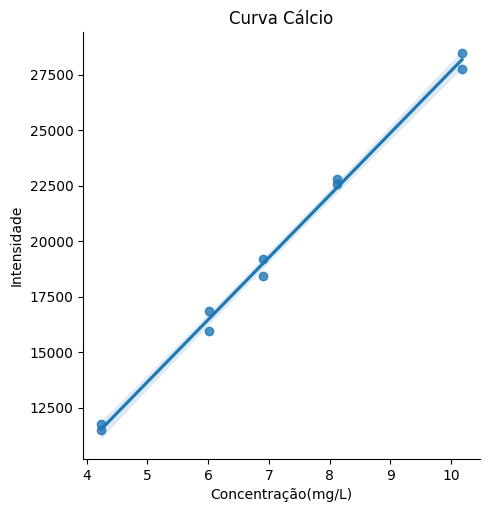

In [90]:
curva = sns.lmplot(data=data, x='C', y='Abs')
plt.title('Curva Cálcio')
plt.xlabel('Concentração(mg/L)')
plt.ylabel('Intensidade');

# Operações Matriciais

In [ ]:
# Calculando o produto matricial XtX

Xt = X.T
XtX = np.dot(Xt, X)

In [ ]:
#Inversa de XtX

XtX_inv = np.linalg.inv(XtX)


In [ ]:
#Calculando o produto matricial XtY

XtY = np.dot(Xt, Y)

In [ ]:
#Calculando b

b = np.dot(XtX_inv, XtY)

In [ ]:
b

array([[-364.09580788],
       [2803.15700703]])

#Calculando os valores previstos pelo modelo

In [ ]:
y_predito = np.dot(X, b)

In [ ]:
y_predito

array([[11521.28990193],
       [11521.28990193],
       [16510.90937445],
       [16510.90937445],
       [18977.68754064],
       [18977.68754064],
       [22425.57065928],
       [22425.57065928],
       [28172.0425237 ],
       [28172.0425237 ]])

In [ ]:
predito = pd.DataFrame(y_predito, columns=['Predito'])

#Gráfico dos valores preditos pelo modelo

In [ ]:
predito['Real'] = data['Abs']

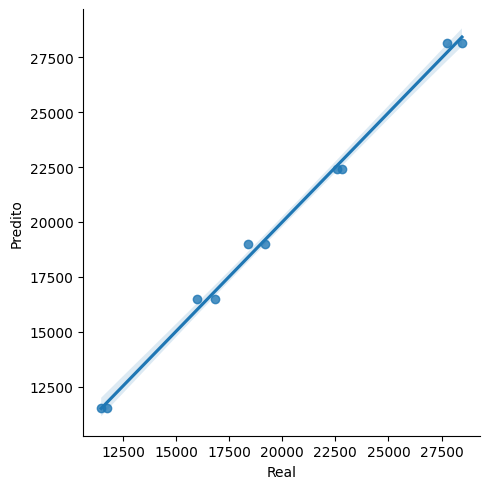

In [ ]:
sns.lmplot(data=predito, x='Real', y='Predito');

#Distribuição dos resíduos

Iremos observar o gráfico de distribuição dos resíduos para avaliar se há alguma tendência ou se o comportamento residual é aleatório.

O ideal é que os resíduos apresentem comportamento aleatório, indicado variância constante (homocedasticidade).

Caso o comportamento seja heterocedástico, o recomendado é utilizar mínimos quadrados ponderados para modelar a regressão.

In [ ]:
residuos = Y - y_predito

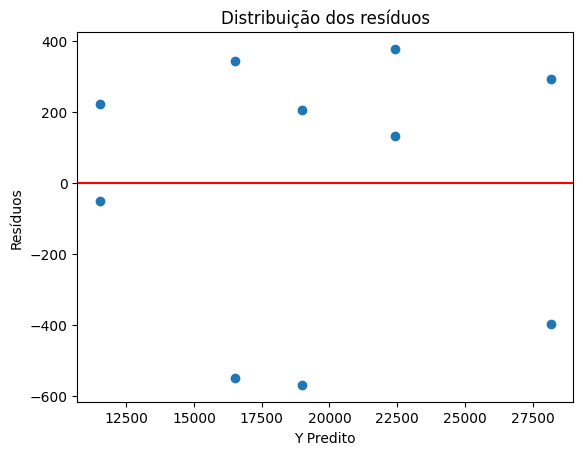

In [ ]:
plt.scatter(y_predito, residuos)
plt.axhline(y=0, color='r')
plt.title('Distribuição dos resíduos')
plt.xlabel('Y Predito')
plt.ylabel('Resíduos')
plt.show()

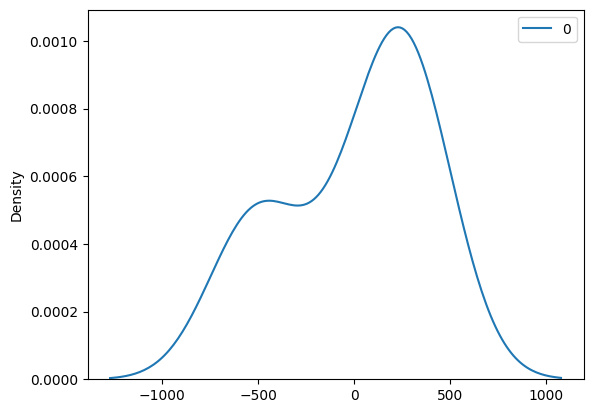

In [ ]:
sns.kdeplot(data=residuos);

# Criando uma função para realizar o cálculo dos coeficientes

* Para ser usados nos estudos posteriores, criei uma função para gerar os coefcieintes de regressão.

No exemplo abaixo, foi usado os mesmos valores de concentração e absorbância e os ceoficientes obtidos foram iguais.



In [ ]:
def coeficientes(X, Y):
  arrayX = np.array(X).reshape(-1, 1)
  vetorY = np.array(Y).reshape(-1, 1)
  matrizX = np.hstack([np.ones(arrayX.shape), arrayX])
  Xt = matrizX.T
  XtX = np.dot(Xt, matrizX)
  XtXinv = np.linalg.inv(XtX)
  XtY = np.dot(Xt, vetorY)
  coef = np.dot(XtXinv, XtY)

  return coef

In [ ]:
a = [4.24, 4.24, 6.02, 6.02, 6.90, 6.90, 8.13, 8.13, 10.18, 10.18]
b = [11743, 11470, 16854, 15962, 19183, 18408, 22556, 22802, 27774, 28463]

In [ ]:
coef = coeficientes(a, b)
coef

array([[-364.09580788],
       [2803.15700703]])

# Análise de Variância

A Análise de variância será utilizada para verificar se o modelo apresenta boa regressão e se apresenta falta de ajuste ou não.

* Calculando a soma dos quadrados

In [ ]:
mediaY = np.mean(Y)

In [ ]:
mediaY

19521.5

In [ ]:
# Soma dos Quadrados Totais
SQT = np.sum((Y - mediaY)**2)
print('Soma dos Quadrados Totais:', SQT)

Soma dos Quadrados Totais: 314495824.5


In [ ]:
#Soma dos Quadrados da Regressão
SQR = np.sum((y_predito - mediaY)**2)
print('Soma dos Quadrados da Regressão:', SQR)

Soma dos Quadrados da Regressão: 313256523.7345916


In [ ]:
#Coeficiente de Determinação
R2 = SQR / SQT
print('R2:', R2)

R2: 0.9960594047079044


In [ ]:
#Soma dos Quadrados dos Resíduos
SQr = SQT - SQR
print('Soma dos Quadrados dos Resíduos:', SQr)

Soma dos Quadrados dos Resíduos: 1239300.7654083967




*   Calculando as médias Quadráticas




In [ ]:
#Média Quadrática da Regressão
MQR = SQR / 1
print('Média dos Quadrados da Regressão:', MQR)

Média dos Quadrados da Regressão: 313256523.7345916


In [ ]:
#Média Quadrática dos Resíduos
MQr = SQr / 8
print('Média dos Quadrados dos Resíduos:', MQr)

Média dos Quadrados dos Resíduos: 154912.5956760496


* Valor de F crítico e F tabelado

In [ ]:
F_calculado = MQR / MQr

In [ ]:
print('O valor do F calculado é:', F_calculado)

O valor do F calculado é: 2022.150118700922


In [ ]:
from scipy.stats import f

F_tabelado = f.ppf(q=0.95, dfn=1, dfd=8)
print('O valor do F tabelado é:', F_tabelado)

O valor do F tabelado é: 5.317655071578714


In [ ]:
# Razão F
print('Razão F:', (F_calculado / F_tabelado))

Razão F: 380.27102011725304


* Como o valor do F calculado é muito superior ao tabelado, cerca de 380 vezes, falhamos em aceitar a hipótese nula eaceitamos a hipótese alternativa, onde pelo menos um coefieinte é diferente de zero.

O valor de F também nos indica que o modelo possui uma boa regressão.

#Calculando o Erro Puro e a Falta de Ajuste

* O erro puro se baseia no erro do laboratório e usamos as replicas para estimá-lo. Esse erro pode estar relacionado a pesagem, a pipetagem, transferência de soluções, entre outros.

Já a falta de ajuste, consiste na fração que o modelo nãoconseguiu modelar. O ideal, para se ter um bom modelo, é que o erro puro ea falta de ajuste se confundam, de modo que assim, sejam estatisticamente iguais.

In [ ]:
#Função para o cálculo do erro puro

def SQE(Y, n_linhas, n_replicas):
  Y_reshape = Y.reshape(int(n_linhas/2), n_replicas)
  media_replicas = np.mean(Y_reshape, axis=1)
  medias = np.repeat(media_replicas, n_replicas).reshape(-1, 1)
  SQE = np.sum((Y-medias)**2)

  return SQE

In [ ]:
SQE = SQE(Y, n_linhas=10, n_replicas=2)
print('Soma dos Quadrados do Erro Puro:', SQE)

Soma dos Quadrados do Erro Puro: 1003027.5


In [ ]:
#Calculando a Falta de Ajuste

Faj = SQr - SQE
print('Falta de ajuste:', Faj)

Falta de ajuste: 236273.26540839672


* Calculando o valor de F para o erro

SQE possui 5 graus de liberdade, pois há duas réplicas e o n é de dez.

Faj possui 3 graus de liberdade, pois é dado pelos graus de liberdade do SQE menos o número de parâmetros do modelo (2).

In [ ]:
F_erro = (Faj / 3) / (SQE / 5)
print('F calculado do erro:', F_erro)

F calculado do erro: 0.3926001786398291


In [ ]:
F_critico_erro = f.ppf(q=0.95, dfn=3, dfd=5)
print('F critico para o erro:', F_critico_erro)

F critico para o erro: 5.40945131805649


* Como o valor do F calculado pra o erro é menor que o F tabelado, aceitamos a hipótese nula, indicando que o erro puro e a falta de auste são estatisticamente iguais.

#Intervalo de Confiança e Significância dos Coeficientes

Para calcular o intervalo de confiança, precisamos da matriz de covariânica, que é dada por pela multiplicação da MQr pelo inverso da multiplicação da matriz transposta de X por X (XtX_inv)

In [ ]:
matriz_cov = XtX_inv * MQr

In [ ]:
diagonal_principal = np.diag(matriz_cov)
diagonal_principal

array([211043.96209815,   3885.80903732])

In [ ]:
#Calculando os erros dos coeficientes
erro_coeficientes = np.sqrt(diagonal_principal)
erro_coeficientes

array([459.3952134 ,  62.33625781])

* Para calcular o IC precisamos do valor de t. Esse terá 7 graus de liberdade, pois SQr possui 8.

In [ ]:
from scipy.stats import t
alfa = 0.05
t_tabelado = t.ppf(1 - alfa/2, 7)
print('Valor de t tabelado:', t_tabelado)

Valor de t tabelado: 2.3646242510102993


In [ ]:
erro_coef1 = erro_coeficientes[0] * t_tabelado
erro_coef2 = erro_coeficientes[1] * t_tabelado

In [ ]:
erros = [erro_coef1, erro_coef2]

print(erros)

[1086.297062412244, 147.40182692654847]


#Gráfico de significância dos coeficientes

In [ ]:
coeficientes = pd.DataFrame(coef, columns=['coeficientes'])
coeficientes['IC'] = erros
coeficientes.index = ['b0','b1']
coeficientes['Significativo'] = np.abs(coeficientes['coeficientes']) > coeficientes['IC']

In [ ]:
coeficientes

,coeficientes,IC,Significativo
b0,-364.095808,1086.297062,False
b1,2803.157007,147.401827,True


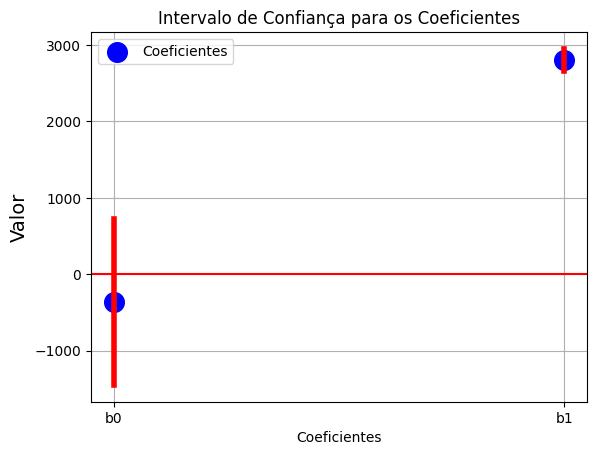

In [ ]:
# Plotar o scatterplot dos coeficientes com intervalo de confiança
plt.scatter(coeficientes.index, coeficientes['coeficientes'], color='blue', label='Coeficientes', s=200)

# Plotar linhas horizontais para os intervalos de confiança
for i, coeficiente in enumerate(coeficientes['coeficientes']):
    intervalo_confianca = coeficientes['IC'][i]
    plt.plot([i, i], [coeficiente - intervalo_confianca, coeficiente + intervalo_confianca], color='red', linewidth=4)


plt.axhline(y=0, color='red')

plt.xlabel('Coeficientes')
plt.ylabel('Valor', fontsize=14)
plt.title('Intervalo de Confiança para os Coeficientes')
plt.xticks(coeficientes.index)
plt.legend()
plt.grid(True)
plt.show()

* Pelo gráfico de significância, observa-se que o coeficiente b0 não é significativo e a equação da regressão toma a forma y = 2803.15 * [Ca].